<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch02_Generatoren/blob/main/04_BilderLadenSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dieses Beispiel ist identisch zu [Dateien laden](https://colab.research.google.com/drive/1oGo4j3oGSKbrg-krFjMvcZa9RV0YTdmN?usp=sharing) - lädt aber Graustufenbilder statt RGB:

In [1]:
!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load
from ml_utils import convert

Cloning into 'ml_utils'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 40 (delta 8), reused 31 (delta 4), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [2]:
zip_url = "http://pitnoack.de/mn/generator_bilder_laden/data.zip"
load.load_and_unzip_from_url(zip_url)

In [7]:
from tensorflow.keras.utils import Sequence
import numpy as np
from PIL import Image
import os
import random

class ImageGenerator(Sequence):

  def __init__(self, dir_, shape, batch_size=25):
    filenames = os.listdir(dir_)
    self.len = int(len(filenames)/batch_size)
    self.shape = shape
    self.batch_size = batch_size
    self.file_paths = load.all_abs_paths_in_dir(dir_)
    random.shuffle(self.file_paths)

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    if index >= self.len:
      raise IndexError("list index out of range")
    else:
      file_paths = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
      batch_x = np.empty((self.batch_size,) + (self.shape), "float32")
      for idx, file_path in enumerate(file_paths):
        img_as_array = load.img_path_to_np_array(file_path)
        img_gray = convert.rgb_to_grayscale(img_as_array)
        batch_x[idx] = img_gray
      return batch_x, batch_x

In [8]:
train_dir = "/content/data/img_train"

train_gen = ImageGenerator(train_dir, (48, 48))

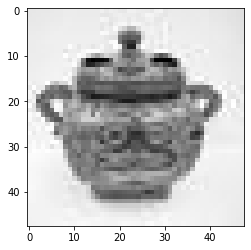

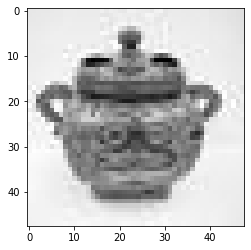

In [9]:
from matplotlib import pyplot as plt

img_x = train_gen[1][0][0]

plt.imshow(img_x, cmap="gray")
plt.show()

img_y = train_gen[1][1][0]
plt.imshow(img_y, cmap="gray")
plt.show()


In [ ]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.datasets import mnist

shape = (48, 48)

input_layer = Input(shape=shape)

x = Flatten()(input_layer)

x = Dense(units=2304, activation='sigmoid')(x)

output_layer = Reshape(shape)(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2304)              5310720   
_________________________________________________________________
reshape_1 (Reshape)          (None, 48, 48)            0         
Total params: 5,310,720
Trainable params: 5,310,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = Adam(lr=0.0005)

def loss(y_true, y_pred):
  return K.mean(K.square(y_true - y_pred), axis = [1,2])

model.compile(loss=loss, optimizer=optimizer)

In [ ]:
model.fit(train_gen, epochs=50)

Epoch 1/50
100/100 [==============================] - 2s 24ms/step - loss: 0.0056
Epoch 2/50
100/100 [==============================] - 3s 25ms/step - loss: 0.0057
Epoch 3/50
100/100 [==============================] - 3s 26ms/step - loss: 0.0056
Epoch 4/50
100/100 [==============================] - 3s 26ms/step - loss: 0.0054
Epoch 5/50
100/100 [==============================] - 3s 25ms/step - loss: 0.0053
Epoch 6/50
100/100 [==============================] - 3s 25ms/step - loss: 0.0052
Epoch 7/50
100/100 [==============================] - 2s 25ms/step - loss: 0.0053
Epoch 8/50
100/100 [==============================] - 3s 25ms/step - loss: 0.0053
Epoch 9/50
100/100 [==============================] - 3s 25ms/step - loss: 0.0051
Epoch 10/50
100/100 [==============================] - 2s 23ms/step - loss: 0.0050
Epoch 11/50
100/100 [==============================] - 2s 25ms/step - loss: 0.0049
Epoch 12/50
100/100 [==============================] - 3s 25ms/step - loss: 0.0048
Epoch 13/50
1

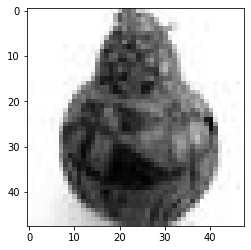

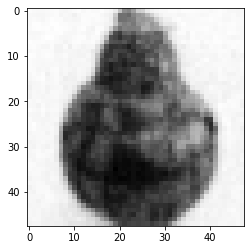

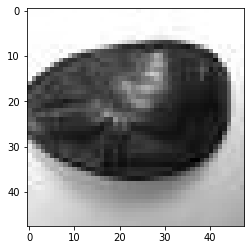

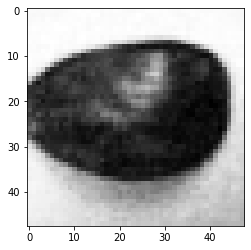

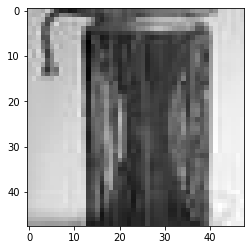

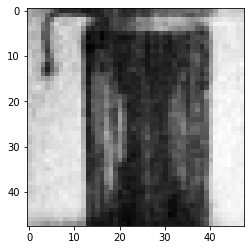

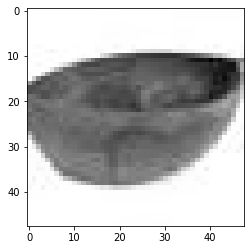

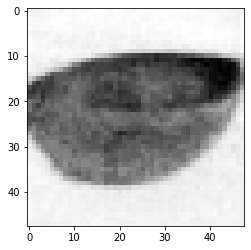

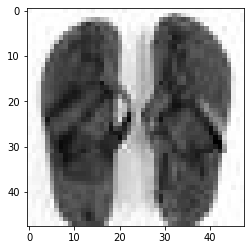

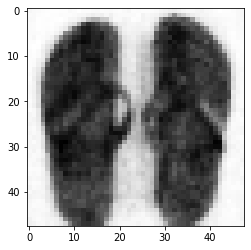

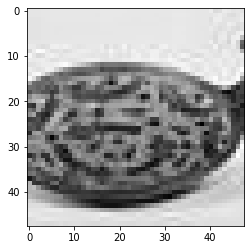

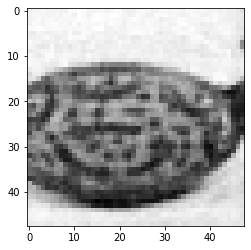

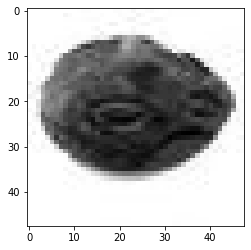

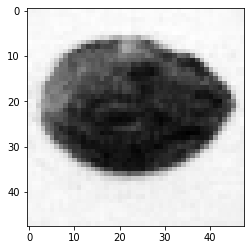

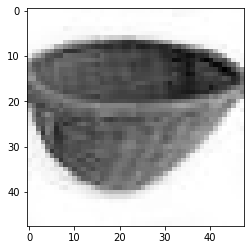

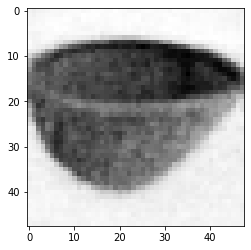

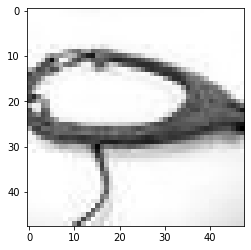

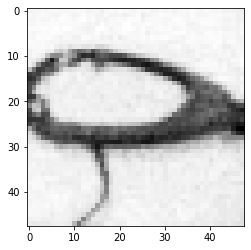

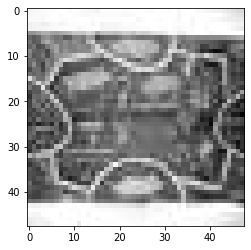

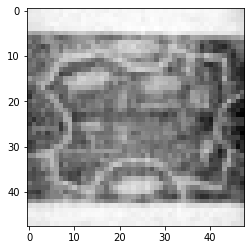

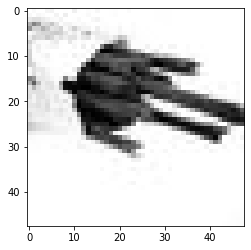

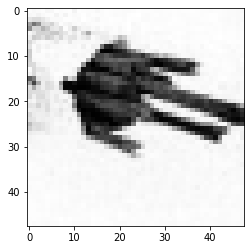

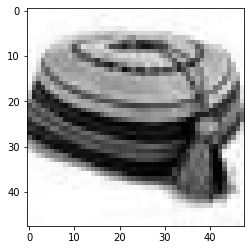

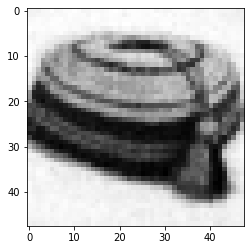

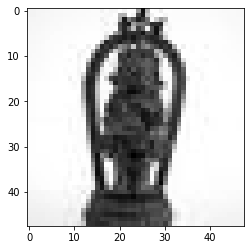

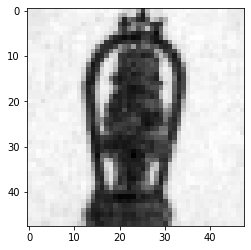

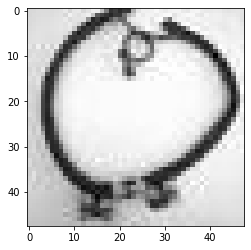

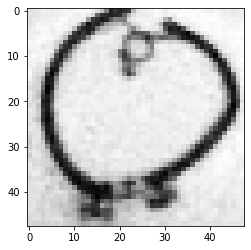

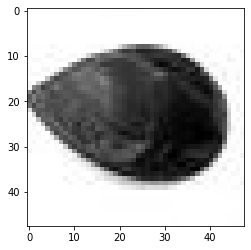

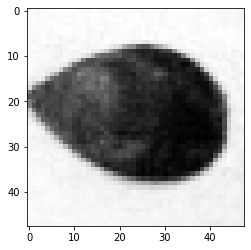

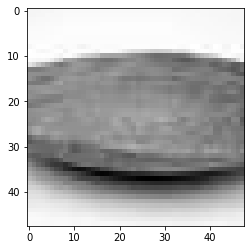

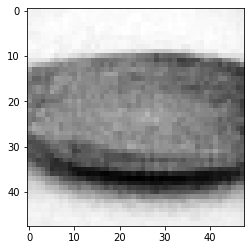

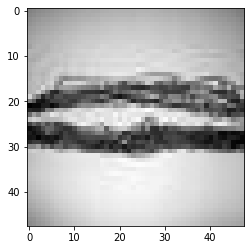

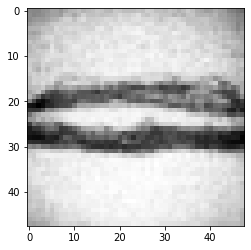

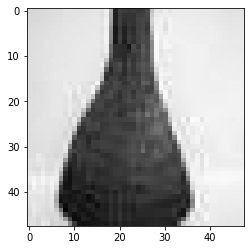

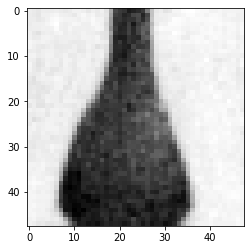

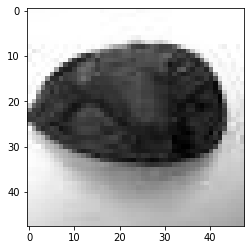

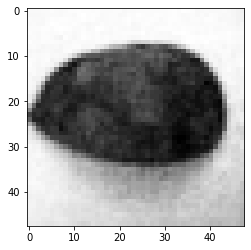

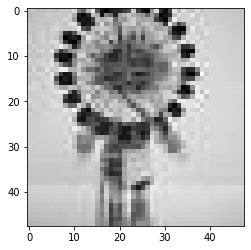

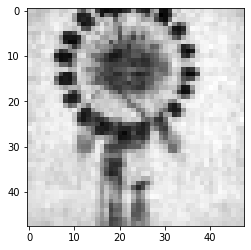

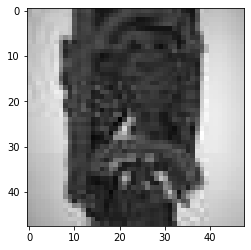

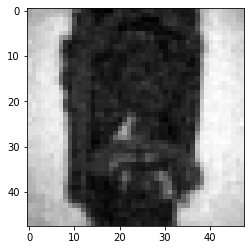

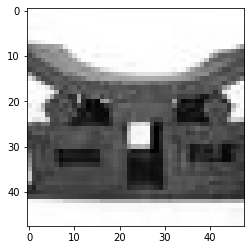

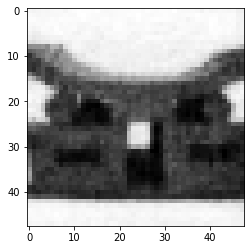

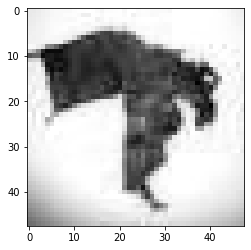

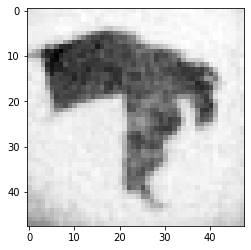

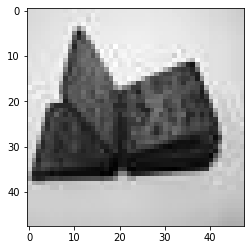

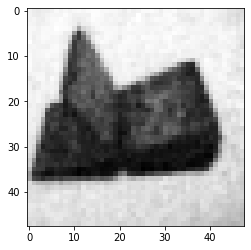

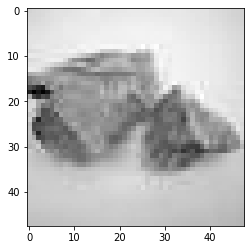

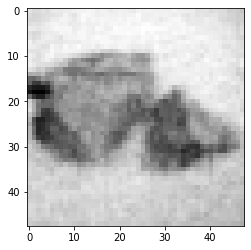

In [ ]:
x = train_gen[3][0]
y = model.predict(x)

for idx in range(x.shape[0]):
  plt.imshow(x[idx], cmap="gray")
  plt.show()
  plt.imshow(y[idx], cmap="gray")
  plt.show()

In [ ]:
# !zip -r /content/file.zip /content/data

TODO:

Zwei Beipsiele daraus machen (Version 2 mit Validierungs Generator)

Bessere Bilder (Ethnologie Daten!!!!)